In [2]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')
datasets = [train, test]

In [4]:
train.info()
print('-' * 40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [5]:
complete = pd.concat([train, test], ignore_index=True)
print(complete.to_string())

        Age            Cabin Embarked      Fare                                               Name  Parch  PassengerId  Pclass     Sex  SibSp  Survived              Ticket
0     22.00              NaN        S    7.2500                            Braund, Mr. Owen Harris      0            1       3    male      1       0.0           A/5 21171
1     38.00              C85        C   71.2833  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2       1  female      1       1.0            PC 17599
2     26.00              NaN        S    7.9250                             Heikkinen, Miss. Laina      0            3       3  female      0       1.0    STON/O2. 3101282
3     35.00             C123        S   53.1000       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4       1  female      1       1.0              113803
4     35.00              NaN        S    8.0500                           Allen, Mr. William Henry      0            5       3    male      

In [6]:
# drop columns
train = train.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
test = test.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)

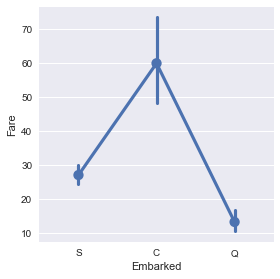

In [7]:
sns.factorplot(
    x='Embarked',
    y='Fare',
    data=train
)

In [8]:
train.loc[(train['Embarked'].isnull())]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [9]:
# high fares, let them be Embarked = 'C'
train.loc[(train['Embarked'].isnull()), 'Embarked'] = 'C'

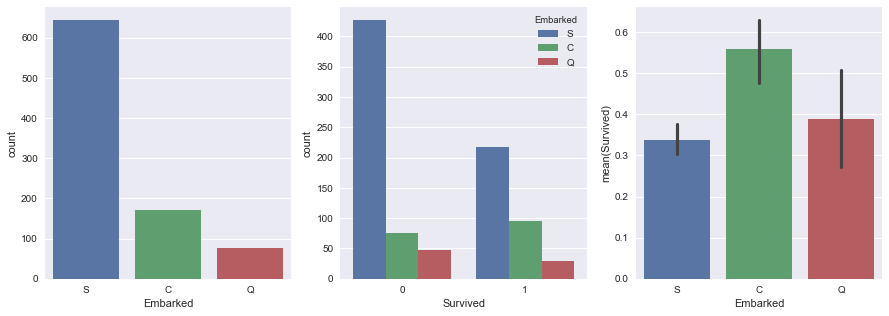

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(
    x='Embarked',
    data=train,
    ax=ax1
)
sns.countplot(
    x='Survived',
    hue='Embarked',
    data=train,
    ax=ax2
)
sns.barplot(
    x='Embarked',
    y='Survived',
    data=train,
    ax=ax3
)

In [12]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


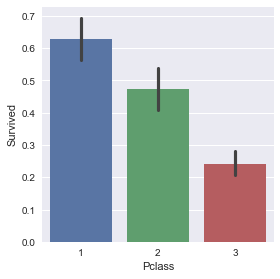

In [13]:
sns.factorplot(
    x='Pclass',
    y='Survived',
    data=train,
    kind='bar'
)

In [14]:
pclass_dum = pd.get_dummies(train['Pclass'])
pclass_dum

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,0,1
8,0,0,1
9,0,1,0


In [18]:
pclass_dum.columns = ['Pclass_{i}'.format(i=i+1) for i in range(3)]
pclass_dum

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,0,1
8,0,0,1
9,0,1,0


In [19]:
train = train.join(pclass_dum)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,3,male,22.0,1,0,7.2500,S,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,0,0,1
5,0,3,male,NaN,0,0,8.4583,Q,0,0,1
6,0,1,male,54.0,0,0,51.8625,S,1,0,0
7,0,3,male,2.0,3,1,21.0750,S,0,0,1
8,1,3,female,27.0,0,2,11.1333,S,0,0,1
9,1,2,female,14.0,1,0,30.0708,C,0,1,0
